# 1. Load Data & Overview

In [2]:
import pandas as pd
df = pd.read_excel('PYTHON/DATA/Master-Cafe-Soho-OC-Puteri-050520.xlsx', parse_dates=True, index_col='Sales date', decimal=',')

In [3]:
df.head(3)

,Quantity,Units,Category,Product,Variant,SKU,Register name,Sales time,Cost Price,Retail Price,Total VAT,Total margin,Margin %,Total,Vat Rate,Discount Description,Discount Amount,Discount Percentage,Sequence no.
Sales date,,,,,,,,,,,,,,,,,,,
2017-03-28,1,stykk,NaN,Manuelt produkt,NaN,NaN,Oslo City 2,11:31:07,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,1.0
2017-03-28,1,stykk,NaN,Lippe Kaffe,NaN,NaN,Oslo City 2,11:45:30,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,2.0
2017-03-28,1,stykk,NaN,Manuelt produkt,NaN,NaN,Oslo City 1,12:49:26,0.0,1.0,0.0,0.0,0.0,1.0,0.0,NaN,0.0,0.0,1.0


In [3]:
df.shape

(97380, 19)

In [4]:
df.describe()

,Quantity,SKU,Cost Price,Retail Price,Total VAT,Total margin,Margin %,Total,Vat Rate,Discount Amount,Discount Percentage,Sequence no.
count,97380.000000,9.632900e+04,97380.000000,97380.000000,97380.000000,97380.000000,97380.000000,97380.000000,97380.000000,97380.000000,97380.000000,96889.000000
mean,1.113740,1.454371e+12,9.183942,51.399945,10.013062,34.368570,68.566428,55.899174,0.210381,0.857918,0.013139,13762.212408
std,0.405831,1.423809e+11,8.961861,42.330882,7.956730,23.892797,25.944476,46.989719,0.066528,5.389697,0.056475,8287.255075
min,-4.000000,1.447457e+08,-42.000000,-179.000000,-35.800000,-116.650000,-45.560000,-179.000000,0.000000,-69.500000,0.000000,1.000000
25%,1.000000,1.447629e+12,3.000000,35.000000,6.400000,23.760000,58.790000,35.000000,0.150000,0.000000,0.000000,6622.000000
50%,1.000000,1.457637e+12,5.860000,42.000000,8.400000,28.340000,76.620000,45.000000,0.250000,0.000000,0.000000,13415.000000
75%,1.000000,1.490552e+12,14.100000,65.000000,13.000000,44.920000,84.930000,69.000000,0.250000,0.000000,0.000000,20458.000000
max,24.000000,1.513951e+12,189.000000,4718.000000,615.390000,650.000000,100.000000,4718.000000,0.250000,747.500000,1.000000,30766.000000


In [5]:
# where Total is maximum
df[df.Total==4718]

,Quantity,Units,Category,Product,Variant,SKU,Register name,Sales time,Cost Price,Retail Price,Total VAT,Total margin,Margin %,Total,Vat Rate,Discount Description,Discount Amount,Discount Percentage,Sequence no.
Sales date,,,,,,,,,,,,,,,,,,,
2017-06-16,1,stykk,NaN,Markedsdager - Total Bank,NaN,NaN,Oslo City 2,21:20:21,0.0,4718.0,615.39,0.0,0.0,4718.0,0.15,NaN,0.0,0.0,7396.0


In [ ]:
# where Total greater than 1K
df[df.Total>1e3]

# 2. Plot data

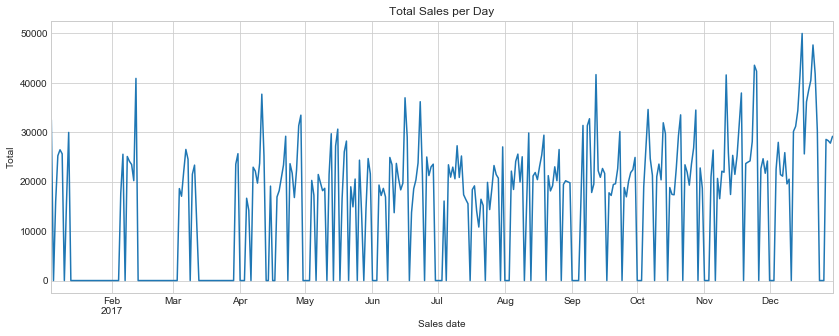

In [4]:
# sum sales per day
df2 = df.resample('D')['Total'].sum()

import matplotlib.pyplot as plt
plt.style.use('seaborn-whitegrid')

df2.plot(figsize=(14, 5))
plt.ylabel('Total')
plt.title('Total Sales per Day')
plt.show();

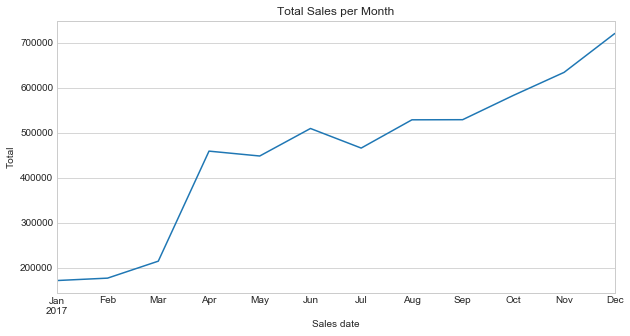

In [5]:
# sum sales per month
df.resample('M')['Total'].sum().plot(figsize=(10,5))
plt.ylabel('Total')
plt.title('Total Sales per Month')
plt.show();

#### Sales per day in different months
- 3 first days of a month has no sales

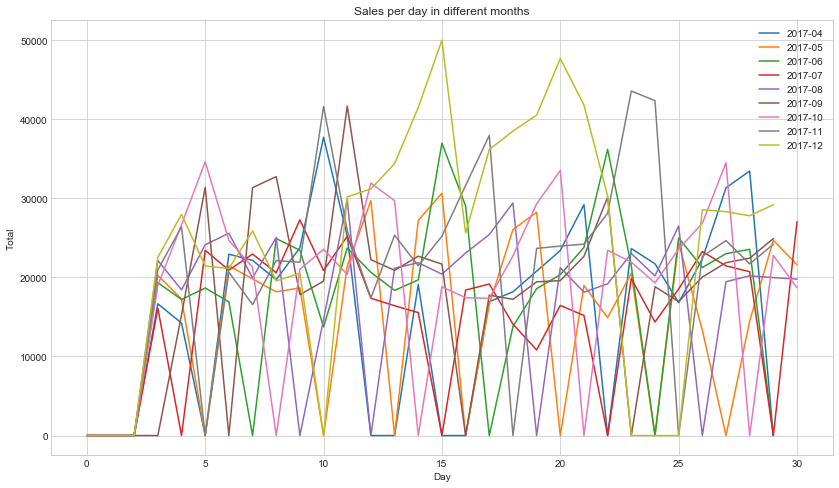

In [6]:
df_tmp = df.resample('D')['Total'].sum()['2017-04-01':].copy()
months = {n: g.reset_index() for n, g in df_tmp.groupby(pd.Grouper(freq='M'))}
plt.figure(figsize=(14, 8))
for n, g in months.items():
    plt.plot(g.index, g['Total'], label=str(n)[:7])
plt.title('Sales per day in different months')
plt.ylabel('Total')
plt.xlabel('Day')
plt.legend()
plt.show()   

#### Sales per day in different weeks
- Sundays almost no sales
- Thurdays have more day-off than other working days

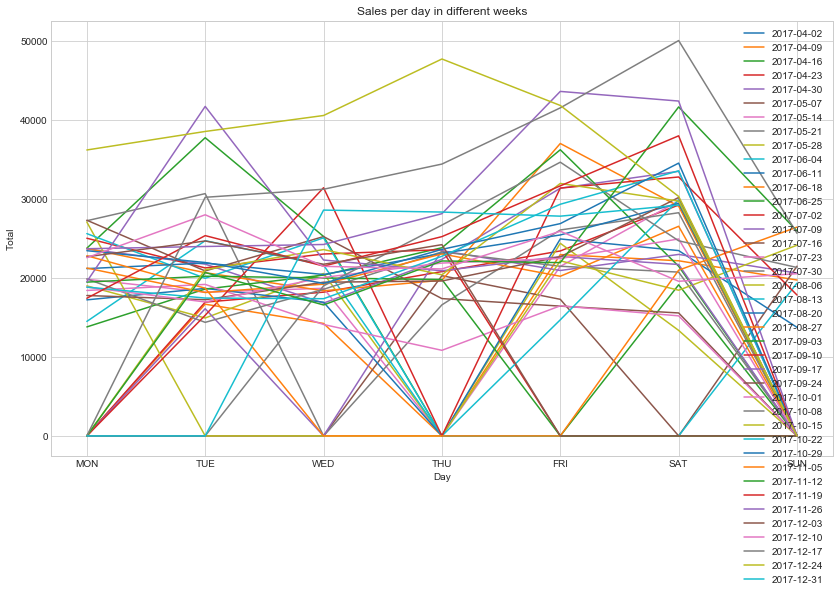

In [7]:
import numpy as np
df_tmp = df.resample('D')['Total'].sum()['2017-04-01':].copy()
weeks = {n: g.reset_index() for n, g in df_tmp.groupby(pd.Grouper(freq='W'))}
fig, ax = plt.subplots(figsize=(14, 8))
x = np.array(['TMP', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
ax.set_xticklabels(x)
for n, g in weeks.items():
    plt.plot(g.index, g['Total'], label=str(n)[:10])
plt.title('Sales per day in different weeks')
plt.ylabel('Total')
plt.xlabel('Day')
plt.legend()
plt.show()    

#### Average Sales per Day in A Week
- Sundays almost closed 
- The highest sales on Saturdays
- The least sales on Mondays

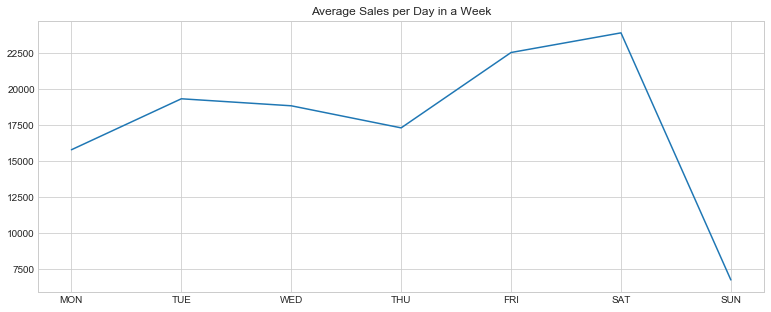

In [8]:
d = {}
for g in weeks.values():
    for i in range(g.shape[0]):
        d[i] = d.get(i, []) + [g.loc[i, 'Total']]
m = pd.DataFrame.from_dict({i: np.array(x).mean() for i, x in d.items()}, orient='index')
m.set_index(x[1:], drop=True).plot(legend=None,
                                   figsize=(13, 5),
                                  title='Average Sales per Day in a Week'
                                  );

## Observations

- Norway holiday calendar
    - https://www.timeanddate.com/calendar/?year=2017&country=18
- No sales on the $1^{st}$, $2^{nd}$ and $3^{rd}$ every month
- Jan and Feb have 21 days no income, Mar has 19 days no income

In [ ]:
# dates no sales
df2[df2==0].index.tolist()

In [13]:
# no. of days in a month no sales
df2[df2==0].resample('M').count()

Sales date
2017-01-31    21
2017-02-28    21
2017-03-31    19
2017-04-30    10
2017-05-31    10
2017-06-30     7
2017-07-31     7
2017-08-31     7
2017-09-30     7
2017-10-31     7
2017-11-30     6
2017-12-31     7
Freq: M, Name: Total, dtype: int64

# 3. Build model

In [9]:
df1 = df.groupby('SKU').resample('D')['Total'].sum()
df1.head()

SKU          Sales date
144745703.0  2017-01-04    588.0
             2017-01-05      0.0
             2017-01-06      0.0
             2017-01-07    196.0
             2017-01-08     98.0
Name: Total, dtype: float64

In [10]:
df1_unstack = df1.unstack()
df1_unstack

Sales date,2017-01-04,2017-01-05,2017-01-06,2017-01-07,2017-01-08,2017-01-09,2017-01-10,2017-01-11,2017-01-12,2017-01-13,...,2017-12-21,2017-12-22,2017-12-23,2017-12-24,2017-12-25,2017-12-26,2017-12-27,2017-12-28,2017-12-29,2017-12-30
SKU,,,,,,,,,,,,,,,,,,,,,
1.447457e+08,588.00,0.0,0.0,196.00,98.00,867.3,0.0,294.0,312.00,0.0,...,520.00,416.0,0.00,0.0,0.0,0.0,416.00,312.00,312.00,416.00
1.447456e+12,1180.00,0.0,338.0,1122.00,1224.00,663.0,0.0,596.7,1114.35,0.0,...,1165.35,1632.0,706.35,0.0,0.0,0.0,1020.00,1165.35,969.00,1020.00
1.447457e+12,1300.65,0.0,207.0,1173.00,621.00,483.0,0.0,138.0,483.00,0.0,...,1656.00,1380.0,1438.65,0.0,0.0,0.0,1162.65,1152.30,1231.65,1369.65
1.447457e+12,207.00,0.0,69.0,276.00,403.65,897.0,0.0,276.0,0.00,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.447457e+12,645.15,0.0,621.0,727.95,955.65,345.0,0.0,276.0,403.65,0.0,...,1725.00,945.3,786.60,0.0,0.0,0.0,679.65,1173.00,610.65,621.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1.512399e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,109.00,0.0,0.0,0.0,0.00,109.00,NaN,NaN
1.512399e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1.512418e+12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,2.00,4.0,2.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [16]:
df1_unstack.shape

(235, 361)

In [17]:
df1_unstack.index[0]

144745703.0

## 3.1. Build Model for one Product, e.g. SKU==144745703

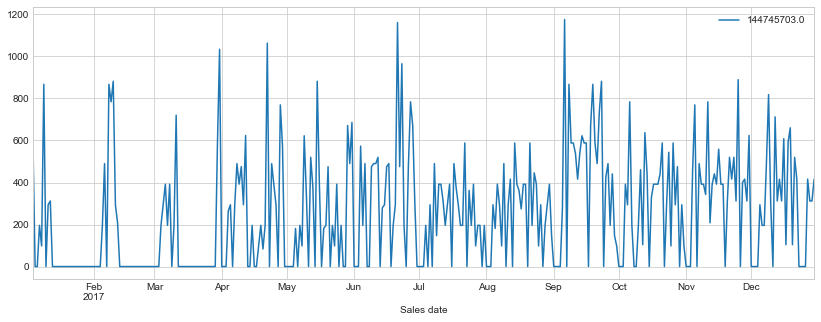

In [11]:
sku1 = pd.DataFrame(df1_unstack.iloc[0, :])
sku1.plot(figsize=(14, 5));

In [12]:
# take only data from April
sku1 = sku1['2017-04-01':].rename(columns={144745703.0: 'Total'})
sku1.head(3)

,Total
Sales date,
2017-04-01,0.0
2017-04-02,0.0
2017-04-03,0.0


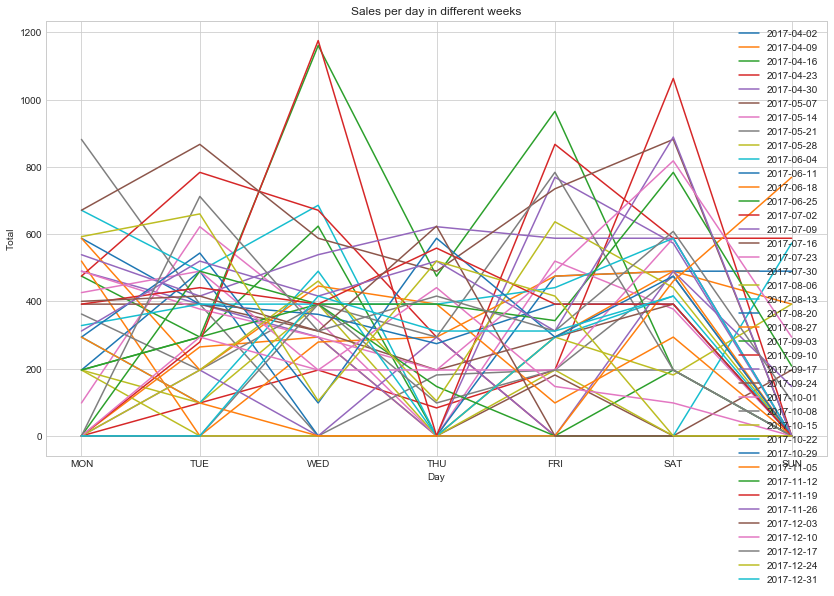

In [13]:
import numpy as np
# df_tmp = df.resample('D')['Total'].sum()['2017-04-01':].copy()
weeks = {n: g.reset_index() for n, g in sku1.groupby(pd.Grouper(freq='W'))}
fig, ax = plt.subplots(figsize=(14, 8))
x = np.array(['TMP', 'MON', 'TUE', 'WED', 'THU', 'FRI', 'SAT', 'SUN'])
ax.set_xticklabels(x)
for n, g in weeks.items():
    plt.plot(g.index, g['Total'], label=str(n)[:10])
plt.title('Sales per day in different weeks')
plt.ylabel('Total')
plt.xlabel('Day')
plt.legend()
plt.show()    

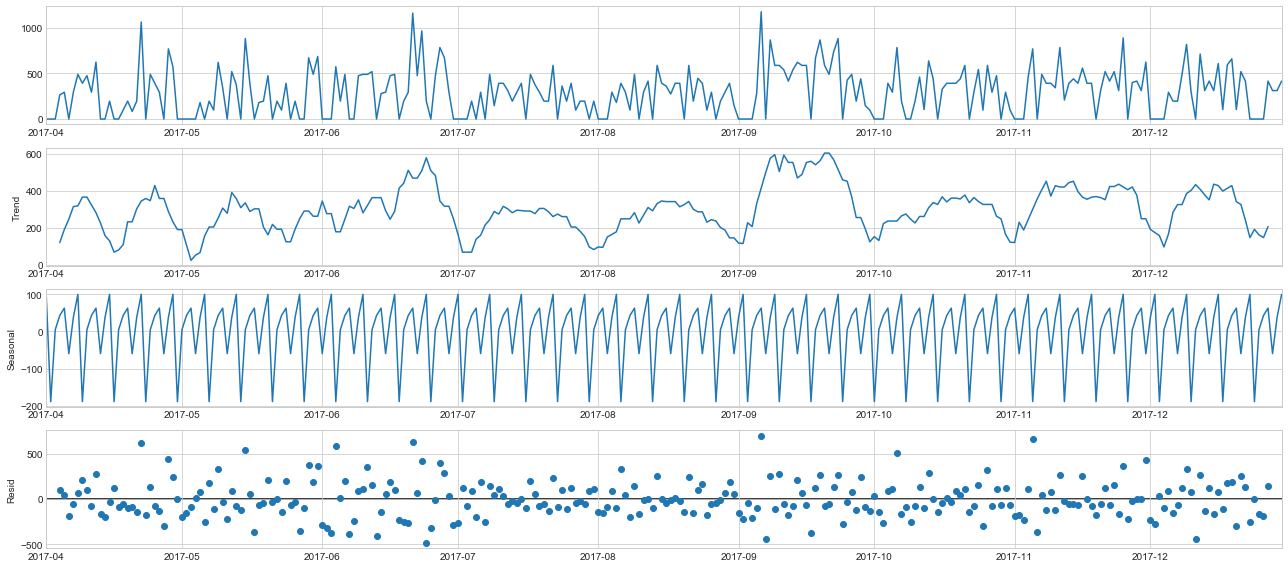

In [21]:
from pylab import rcParams
import statsmodels.api as sm

rcParams['figure.figsize'] = 18, 8
decomposition = sm.tsa.seasonal_decompose(sku1, model='additive')
fig = decomposition.plot()
plt.show()

## 3.1.1. ARIMA (Autoregressive Integrated Moving Average)

The Mean Squared Error of SARIMAX: 65448.74


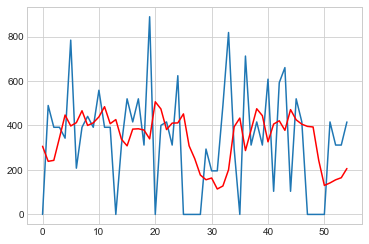

In [14]:
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
 
X = sku1.values
size = int(len(X) * .8) # train has 80% of all data
train, test = X[0:size], X[size:len(X)]
history = [x for x in train]
predictions = list()
for t in range(len(test)):    
    model = ARIMA(history, order=(5,1,0))
    model_fit = model.fit(disp=0)
    output = model_fit.forecast()
    yhat = output[0]
    predictions.append(yhat)
    obs = test[t]
    history.append(obs)
#     print('predicted=%f, expected=%f' % (yhat, obs))
mse = mean_squared_error(test, predictions)
print('The Mean Squared Error of SARIMAX: {}'.format(round(mse, 2)))
# plot
plt.figsize = (14, 5)
plt.plot(test)
plt.plot(predictions, color='red')
plt.show()

## 3.1.2. Seasonal ARIMA

In [18]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in pdq]

In [15]:
import itertools

p = d = q = range(0, 2)
pdq = list(itertools.product(p, d, q))
seasonal_pdq = [(x[0], x[1], x[2], 7) for x in list(itertools.product(p, d, q))]

In [19]:
result_all = []
for param in pdq:
    for param_seasonal in seasonal_pdq:
        try:
            mod = sm.tsa.statespace.SARIMAX(train,
                                            order=param,
                                            seasonal_order=param_seasonal,
                                            enforce_stationarity=False,
                                            enforce_invertibility=False,
                                           )
            results = mod.fit()
            result_all.append(results.aic)
            print('ARIMA{}x{}7 - AIC:{}'.format(param, param_seasonal, results.aic))
        except:
            continue

In [17]:
min(result_all)

ValueError: min() arg is an empty sequence

In [54]:
mod = sm.tsa.statespace.SARIMAX(sku1.iloc[:size],
                                order=(1, 1, 1),
                                seasonal_order=(0, 1, 1, 7),
                                enforce_stationarity=False,
                                enforce_invertibility=False
                               )
results = mod.fit()

/home/hantran/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)
/home/hantran/anaconda3/envs/py36/lib/python3.6/site-packages/statsmodels/tsa/base/tsa_model.py:162: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  % freq, ValueWarning)


### Validate Forcast

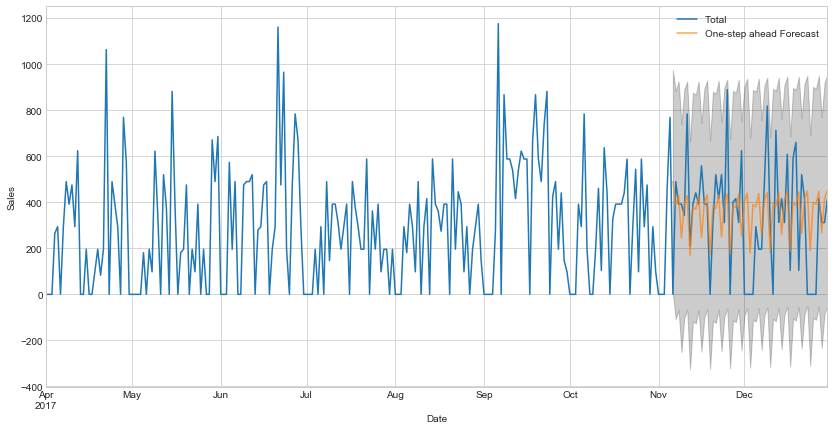

In [55]:
pred = results.get_prediction(start=sku1.index[size], end=sku1.index[-1], dynamic=False)
pred_ci = pred.conf_int()
ax = sku1.plot(label='observed')
pred.predicted_mean.plot(ax=ax, label='One-step ahead Forecast', alpha=.7, figsize=(14, 7))
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.2)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

In [56]:
y_forecasted = pred.predicted_mean
y_truth = sku1.iloc[size:]
mse = ((y_forecasted.values - y_truth.values) ** 2).mean()
print('The Mean Squared Error of SARIMAX: {}'.format(round(mse, 2)))

The Mean Squared Error of SARIMAX: 63723.31


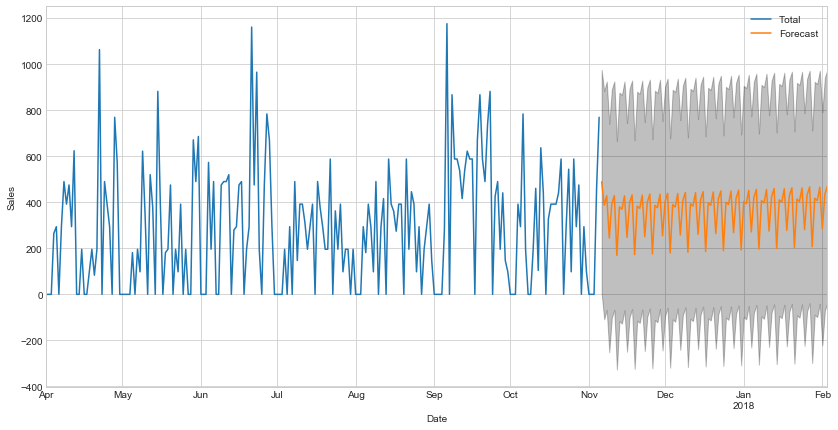

In [57]:
pred_uc = results.get_forecast(steps=90)
pred_ci = pred_uc.conf_int()
ax = sku1[:size].plot(label='observed', figsize=(14, 7))
pred_uc.predicted_mean.plot(ax=ax, label='Forecast')
ax.fill_between(pred_ci.index,
                pred_ci.iloc[:, 0],
                pred_ci.iloc[:, 1], color='k', alpha=.25)
ax.set_xlabel('Date')
ax.set_ylabel('Sales')
plt.legend()
plt.show()

## Forcast with FBProphet

In [7]:
!pip install holidays==0.9.12

     |████████████████████████████████| 85 kB 1.0 MB/s eta 0:00:01
  Created wheel for holidays: filename=holidays-0.9.12-py3-none-any.whl size=47610 sha256=ecf780d43aeba14c7f0e2d9a29a51ef74de82825a9f22774296bc6a06652ab60
  Stored in directory: /Users/thihonggiangpham/Library/Caches/pip/wheels/d6/97/f5/f1f13a6a04d5505bdd19c6769841595ad6f6f2095ffd7c37a2
Successfully built holidays
  Attempting uninstall: holidays
    Found existing installation: holidays 0.10.1
    Uninstalling holidays-0.10.1:
      Successfully uninstalled holidays-0.10.1


In [1]:
#!pip install fbprophet
from fbprophet import Prophet

ERROR:fbprophet:Importing plotly failed. Interactive plots will not work.


In [2]:
m = Prophet()
m.add_country_holidays(country_name='NO')
sku_prophet = sku1.reset_index().rename(columns={'Sales date': 'ds', 'Total': 'y'})
size = int(sku_prophet.shape[0] * .8)
train, test = sku_prophet[:size], sku_prophet[size:]
future = test[['ds']]
m.fit(train)
forecast = m.predict(future)
fig1 = m.plot(forecast)

NameError: name 'sku1' is not defined

In [32]:
m.train_holiday_names

0     Første nyttårsdag, Søndag
1                        Søndag
2       Første påskedag, Søndag
3       Første pinsedag, Søndag
4               Arbeidernes dag
5                  Grunnlovsdag
6                Første juledag
7                 Andre juledag
8                  Skjærtorsdag
9                    Langfredag
10               Andre påskedag
11        Kristi himmelfartsdag
12               Andre pinsedag
dtype: object

In [33]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

,ds,yhat,yhat_lower,yhat_upper
50,2017-12-26,404.151943,93.375727,710.666214
51,2017-12-27,469.250937,156.971504,767.843047
52,2017-12-28,286.209027,-12.670868,576.206489
53,2017-12-29,437.044267,140.484076,728.550886
54,2017-12-30,458.382356,167.845383,760.677001


In [34]:
f1 = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
f2 = f1.merge(test)
f2.head()

,ds,yhat,yhat_lower,yhat_upper,y
0,2017-11-06,393.465654,93.434680,706.957373,0.0
1,2017-11-07,375.709939,55.120654,676.520031,490.0
2,2017-11-08,440.808932,134.501786,746.367618,392.0
3,2017-11-09,257.767022,-59.104127,541.165632,392.0
4,2017-11-10,408.602262,89.298883,711.342390,343.0


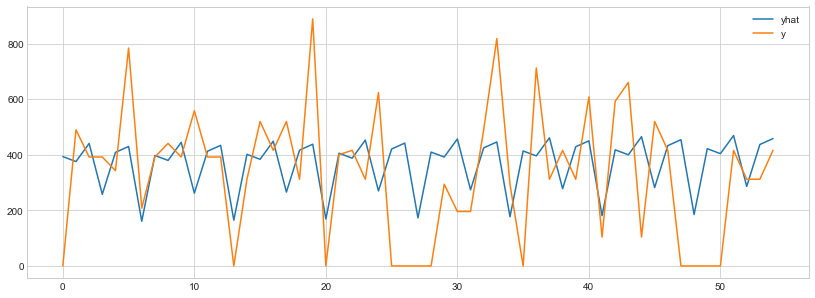

In [35]:
f2[['yhat', 'y']].plot(figsize=(14, 5));

In [36]:
mse = ((f2.yhat-f2.y)**2).mean()
print('The Mean Squared Error of our forecasts is {}'.format(round(mse, 2)))

The Mean Squared Error of our forecasts is 54215.63


In [37]:
future = m.make_future_dataframe(periods=90)
future.tail()

,ds
304,2018-01-30
305,2018-01-31
306,2018-02-01
307,2018-02-02
308,2018-02-03


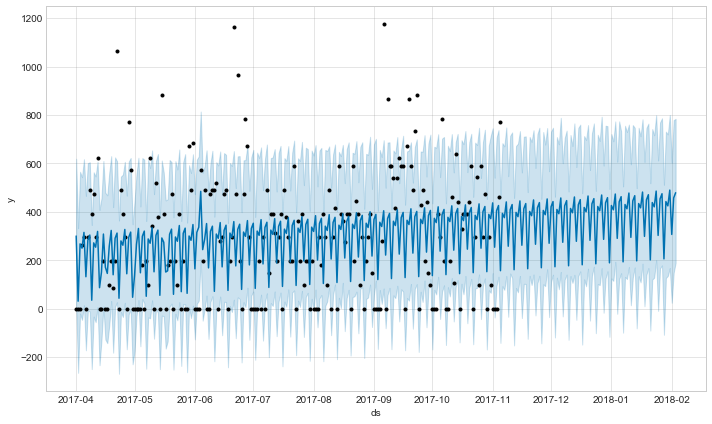

In [38]:
forecast = m.predict(future)
fig1 = m.plot(forecast)

# Conclusion 

### Data Understanding

0. Time-Series data from 04 Jan 2017 to 30 Dec 2017 

1. Days don't have sales
    - Except Norwway holidays (https://www.timeanddate.com/calendar/?year=2017&country=18)
    - No sales on the  1𝑠𝑡 ,  2𝑛𝑑  and  3𝑟𝑑  of all months
    - Jan and Feb have 21 days no income, Mar has 19 days no income

2. Regarding sales per month
    - Jan, Feb and Mar have only some working days -> should not consider in building model
    - Increasing in trend
    
3. Regarding sales per day in a week
    - Sundays almost no sales (Sundays almost closed?
    - Thursdays have more day-off than any other working days
    - The highest sales on Saturdays
    - The least sales on Mondays

## Models

- A time-series model should be used to predict sales for the future
- Data taken from April and split into train (80%) and test (20%)
- Error metrics used: MSE (Mean squared error)


**3 models used**
- ARIMA
- SARIMAX
- FBProphet

| Algorithm | MSE | 
    | --- | --- | 
    | ARIMA | 65,448.73 | 
    | SARIMAX | 63,723.31 | 
    | Prophet | 54,215.63 | 

- **FBProphet** gives the best performance
    - it also takes care of holidays in training process
- However, the results are not reliable because we do not have enough data (not big enough) to make a good prediction -> need to have at least one whole year to predict sales of the next year or some specific dates or month of the future